# Working on Real Project with Python on 'London Housing Dataset'

## (A part of Big Data Analysis)

----

# LONDON HOUSING DATASET

-----

This dataset is primarily centered around the housing market of London. It contains a lot of additional relevant data:

* Monthly average house prices
* Yearly number of houses sold
* Monthly number of crimes committed

The data used here is from year 1995 to 2019 of each different area.

This data is available as a CSV file, downloaded from Kaggle.

We will analyze this data using the Pandas DataFrame.

Here, random sets of quesitons are given for which we have to find correct results.

This project is for beginners and for those who want to know how we analyze big data with Python.

 ----

In [87]:
import pandas as pd

In [88]:
data = pd.read_csv('csv_files/housing_data.csv')

In [89]:
data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


In [4]:
# 1. 
# df.count()
# df.isnull().sum()

In [8]:
%pip install seaborn

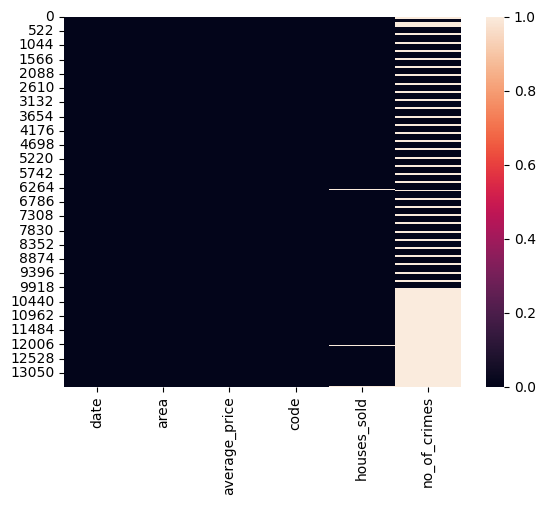

In [10]:
# 2.
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull())
plt.show()

-----

### (A) Convert the Datatype of 'Date' column to Date-Time format.

In [90]:
data.date = pd.to_datetime(data.date)

In [91]:
data.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

### (B.1) Add a new column ''year'' in the dataframe, which contains years only.

In [92]:
data['year'] = data.date.dt.year

In [97]:
data.insert(1, 'year', data.date.dt.year)

### (B.2) Add a new column ''month'' as 2nd column in the dataframe, which contains month only.

In [93]:
data.insert(1, 'month', data.date.dt.month)

In [94]:
data.head(3)

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995


### (C) Remove the columns 'year' and 'month' from the dataframe.

In [95]:
data.drop(['year', 'month'], axis = 1, inplace = True)

In [96]:
data.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN


### (D) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?

In [98]:
data.head(3)

,date,year,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,1995,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,1995,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,1995,city of london,79121,E09000001,14.0,NaN


In [99]:
(data.no_of_crimes == 0).sum()

104

### (E) What is the maximum & minimum 'average_price' per year in england ?

In [100]:
data.query("area == 'england'").agg({'average_price' : ['max', 'min']})

,average_price
max,250410
min,52333


In [101]:
data.query("area == 'england'").groupby('area').agg({'average_price' : ['max', 'min']})

average_price       
                  max    min
area                        
england        250410  52333

### (F) What is the Maximum & Minimum No. of Crimes recorded per area ?

In [102]:
data.groupby('area').agg({'no_of_crimes': ['max', 'min']})

no_of_crimes        
                                max     min
area                                       
barking and dagenham         2049.0  1217.0
barnet                       2893.0  1703.0
bexley                       1914.0   860.0
brent                        2937.0  1850.0
bromley                      2637.0  1441.0
camden                       4558.0  2079.0
city of london                 10.0     0.0
croydon                      3263.0  2031.0
ealing                       3401.0  1871.0
east midlands                   NaN     NaN
east of england                 NaN     NaN
enfield                      2798.0  1635.0
england                         NaN     NaN
greenwich                    2853.0  1513.0
hackney                      3466.0  1870.0
hammersmith and fulham       2645.0  1323.0
haringey                     3199.0  1536.0
harrow                       1763.0   937.0
havering                     1956.0  1130.0
hillingdon                   2819.0  1445.0
hounslow                     2817.0  1529.0
inner london                    NaN     NaN
islington                    3384.0  1871.0
kensington and chelsea       2778.0  1347.0
kingston upon thames         1379.0   692.0
lambeth                      4701.0  2381.0
lewisham                     2813.0  1675.0
london                          NaN     NaN
merton                       1623.0   819.0
newham                       3668.0  2130.0
north east                      NaN     NaN
north west                      NaN     NaN
outer london                    NaN     NaN
redbridge                    2560.0  1487.0
richmond upon thames         1551.0   700.0
south east                      NaN     NaN
south west                      NaN     NaN
southwark                    3821.0  2267.0
sutton                       1425.0   787.0
tower hamlets                3316.0  1646.0
waltham forest               2941.0  1575.0
wandsworth                   3051.0  1582.0
west midlands                   NaN     NaN
westminster                  7461.0  3504.0
yorks and the humber            NaN     NaN

### (G) Show the total count of records of each area, where average price is less than 100000.

In [104]:
data.query("average_price < 100000").groupby('area').area.count()

area
barking and dagenham     85
barnet                   25
bexley                   64
brent                    40
bromley                  33
city of london           11
croydon                  57
ealing                   31
east midlands            96
east of england          76
enfield                  54
england                  87
greenwich                59
hackney                  53
haringey                 33
harrow                   30
havering                 60
hillingdon               44
hounslow                 41
inner london             31
islington                19
kingston upon thames     30
lambeth                  41
lewisham                 62
london                   39
merton                   35
newham                   72
north east              112
north west              111
outer london             46
redbridge                52
south east               59
south west               78
southwark                48
sutton                   54
tower hamlets  

---

---

---

### Solved by Dias Onaibaev

## By - Rohit Grewal